## Upload CSV file

In [ ]:
!pip install mlxtend

!pip install imblearn
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 29.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import sklearn
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier as XGBC
import pickle
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV

In [ ]:
nba_data = pd.read_csv("Cleaned_Data.csv")
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [ ]:
nba_data

,Unnamed: 0,seas_id,season,player_id,player,x3p_percent,pts_per_game,ast_per_game,blk_per_game,all_star,conf,ws,per,pts,ast,trb
0,415,30458,2023,5025,A.J. Green,0.419,4.4,0.6,0.0,False,east,0.8,11.5,154,22,45.0
1,416,30459,2023,5026,A.J. Lawson,0.400,3.7,0.1,0.0,False,east,0.1,13.9,56,2,21.0
2,418,30461,2023,5026,A.J. Lawson,0.400,3.9,0.1,0.0,False,west,0.1,13.5,54,2,20.0
3,419,30467,2023,5027,AJ Griffin,0.390,8.9,1.0,0.2,False,east,2.2,12.6,639,73,153.0
4,420,30462,2023,4219,Aaron Gordon,0.347,16.3,3.0,0.8,False,west,6.8,19.5,1109,203,446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19352,23555,8343,1980,1155,Wes Unseld,0.500,9.7,4.5,0.7,False,east,8.4,15.4,794,366,1094.0
19353,23556,8344,1980,1897,Wiley Peck,0.000,3.5,0.6,0.4,False,west,0.3,8.9,180,33,183.0
19354,23557,8345,1980,1734,Willie Smith,0.239,4.8,4.2,0.0,False,east,1.0,12.2,299,259,121.0
19355,23558,8346,1980,1844,Winford Boynes,0.000,8.5,1.5,0.3,False,east,1.7,13.1,546,95,133.0


Text(0, 0.5, 'pts_per_game')

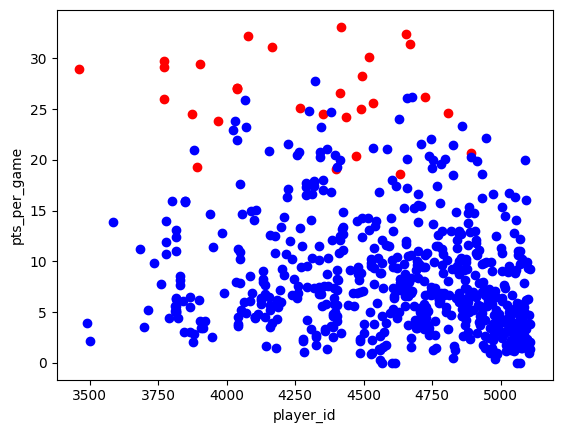

In [ ]:
graph_nba_data = nba_data.iloc[:654]
allstars = graph_nba_data[graph_nba_data['all_star'] == True]
nonallstars = graph_nba_data[graph_nba_data['all_star'] == False]
xlabel = 'player_id'
ylabels = ['pts_per_game', 'x3p_percent']
ylabel = 'pts_per_game'
plt.scatter(allstars[xlabel], allstars[ylabel], color='red', label = 'allstar')
plt.scatter(nonallstars[xlabel], nonallstars[ylabel], color='blue', label = 'nonallstar')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [ ]:
nba_data = pd.read_csv("Cleaned_Data.csv")

droppedSet = nba_data.drop(nba_data.columns[0], axis = 1)
X = droppedSet.drop(["all_star","player_id","player","season","seas_id", "conf"], 1)       # feature matrix

y = nba_data['all_star']   
   
#forward feature selection
sfs = SFS(LinearRegression(),
          k_features=6,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 7)


sfs.fit(X, y)
  
sfs.k_feature_names_

('x3p_percent', 'pts_per_game', 'blk_per_game', 'ws', 'per', 'trb')

In [ ]:
import random

def get_train_test(data, test_size):
    global train
    global test
    train_years = list(range(1980,2023))
    test_years = []
    for i in range(test_size):
        year = random.choice(train_years)
        train_years.remove(year)
        test_years.append(year)
    
    train = data.loc[data['season'].isin(train_years)]
    test = data.loc[data['season'].isin(test_years)]

    print("Test Seasons:")
    print(test_years)
    print("Train Season:" )
    print(train_years)

    # return (train_years, test_years)

get_train_test(nba_data, 6)

Test Seasons:
[2022, 1985, 1980, 2001, 1998, 2019]
Train Season:
[1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2021]


# Random Forest

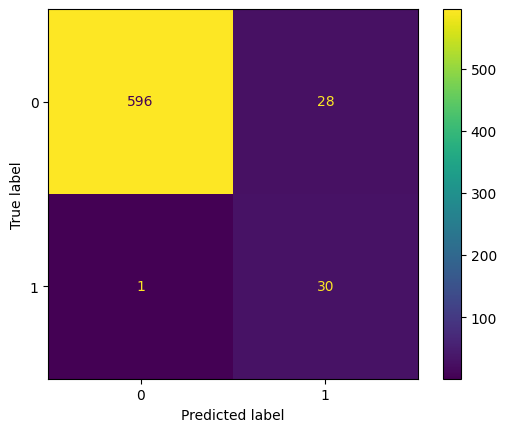

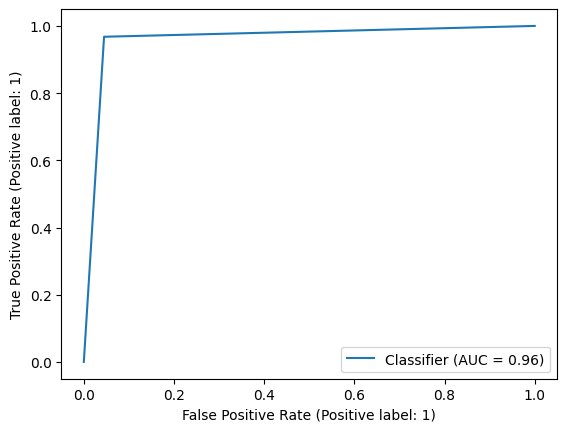

Accuracy Score:  95.573 %
Precision Score:  51.724 %
Recall Score:  96.774 %


In [ ]:
allFeatures = ['x3p_percent','pts_per_game','ast_per_game','blk_per_game', 'ws','per', 'pts', 'ast','trb']

X = nba_data[["ws", "x3p_percent", "blk_per_game", "trb", "per", "pts", 'ast', 'pts_per_game', 'ast_per_game']] 

# train_years, test_years = get_train_test(X, 6)

y = nba_data['all_star']       

testdf = nba_data[nba_data['season'] == 2023]
Xtest = testdf[["ws", "x3p_percent", "blk_per_game", "trb", 'pts_per_game']]
ytest = testdf['all_star']

traindf = nba_data[nba_data['season'] != 2023]
Xtrain = traindf[["ws", "x3p_percent", "blk_per_game", "trb", 'pts_per_game']]
ytrain = traindf['all_star']

parameters = {
'n_estimators': 60,
'max_features': 0.5,
'min_samples_leaf': 10,
}

rf = RandomForestClassifier(max_features=.5, n_estimators=60, min_samples_leaf=10)

'''
grid_search = GridSearchCV(
estimator=rf,
param_grid=parameters,
scoring = 'accuracy',
n_jobs = 10,
cv = 5,
verbose=True)'''
sm = SMOTE(random_state=10)

Xtrain, ytrain = sm.fit_resample(Xtrain, ytrain)
#grid_search.fit(Xtrain, ytrain)
rf.fit(Xtrain, ytrain)

#print(grid_search.best_params_)
#predictions = grid_search.best_estimator_.predict(Xtest)

predictions = rf.predict(Xtest)

confusionmatrix = confusion_matrix(ytest, predictions)
tn, fp, fn, tp = confusionmatrix.ravel()

ConfusionMatrixDisplay(confusionmatrix).plot();
#pd.set_option('display.max_rows', None)
result_df_randomforest = (pd.concat([(testdf[testdf['all_star'] == True])['player'], (pd.DataFrame(predictions, columns=['prediction'])[testdf['all_star'] == True])], 1)).drop_duplicates(subset='player')
#pred_all_stars = pd.DataFrame(predictions, columns=['all_star'])
#pred_all_stars = pred_all_stars[pred_all_stars['all_star'] == True]
#players = pd.DataFrame(testdf['player'])
#displayframe = pd.concat([players, pred_all_stars, predictions], 1)
#displayframe = displayframe.dropna(subset=['all_star'])

#display(displayframe)


sklearn.metrics.RocCurveDisplay.from_predictions(ytest, predictions)
plt.show()

print("Accuracy Score: ", round(accuracy_score(ytest, predictions) * 100, 3), "%")
print("Precision Score: ", round(precision_score(ytest, predictions) * 100, 3), "%")
print("Recall Score: ", round(recall_score(ytest, predictions) * 100, 3), "%")

In [ ]:
display(result_df_randomforest)

,player,prediction
23,Anthony Edwards,True
29,Bam Adebayo,True
97,Damian Lillard,True
119,De'Aaron Fox,True
123,DeMar DeRozan,True
146,Domantas Sabonis,True
148,Donovan Mitchell,True
199,Giannis Antetokounmpo,True
230,Ja Morant,True
269,Jaren Jackson Jr.,True


In [ ]:
pred_all_stars = pd.DataFrame(predictions, columns=['all_star'])
pred_all_stars = pred_all_stars[pred_all_stars['all_star'] == True]
players = pd.DataFrame(testdf['player'])

df1 = pd.concat([players, pred_all_stars], 1)
df1 = df1.dropna(subset=['all_star']).drop_duplicates()

df2 = pd.concat([players, ytest], 1)
mask = df2['all_star'].isin([True])
df2 = df2[mask].drop_duplicates()

display(df1)

,player,all_star
4,Aaron Gordon,True
22,Anthony Davis,True
23,Anthony Edwards,True
29,Bam Adebayo,True
42,Bradley Beal,True
45,Brandon Ingram,True
46,Brook Lopez,True
55,CJ McCollum,True
97,Damian Lillard,True
111,Darius Garland,True


# Neural Network

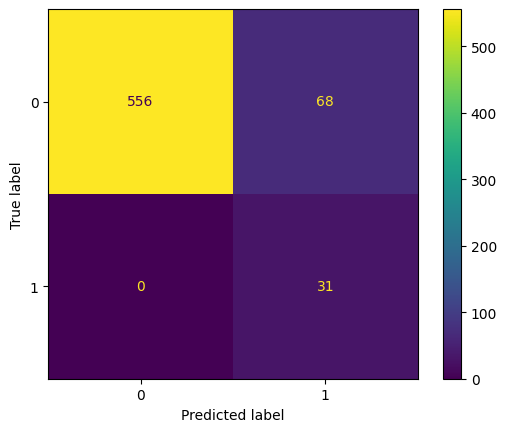

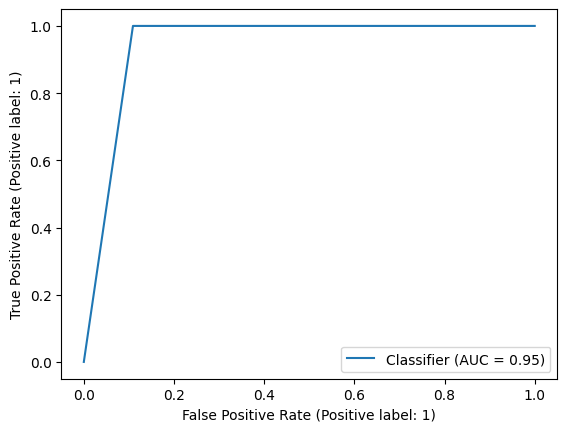

Accuracy Score:  89.618 %
Precision Score:  31.313 %
Recall Score:  100.0 %


In [ ]:
allFeatures = ['x3p_percent','pts_per_game','ast_per_game','blk_per_game', 'ws','per', 'pts', 'ast','trb']

X = nba_data[["ws", "x3p_percent", "blk_per_game", "trb", "per", "pts", 'ast', 'pts_per_game', 'ast_per_game']] 


y = nba_data['all_star']       

testdf = nba_data[nba_data['season'] == 2023]
Xtest = testdf[["ws", "x3p_percent", "blk_per_game", "trb", 'pts_per_game']]
ytest = testdf['all_star']

traindf = nba_data[nba_data['season'] != 2023]
Xtrain = traindf[["ws", "x3p_percent", "blk_per_game", "trb", 'pts_per_game']]
ytrain = traindf['all_star']

# sm = SMOTE(random_state=10)
# Xtrain, ytrain = sm.fit_resample(Xtrain, ytrain)

ada = ADASYN(random_state=42)
Xtrain, ytrain = ada.fit_resample(Xtrain, ytrain)



#rf = RandomForestClassifier()
#rf.fit(Xtrain, ytrain)
#predictions = rf.predict(Xtest)

NN = MLPClassifier(hidden_layer_sizes=(130, 100, 50), max_iter=300, activation='relu', solver='sgd', random_state=1)
NN.fit(Xtrain, ytrain)

predictions = NN.predict(Xtest)

confusionmatrix = confusion_matrix(ytest, predictions)

ConfusionMatrixDisplay(confusionmatrix).plot();

result_df_nn = (pd.concat([(testdf[testdf['all_star'] == True])['player'], (pd.DataFrame(predictions, columns=['prediction'])[testdf['all_star'] == True])], 1)).drop_duplicates(subset='player')
#pd.set_option('display.max_rows', None)
# display(pd.concat([testdf['player'], pd.DataFrame(predictions, columns=['all_star']), ytest], 1))
#all_stars = pd.DataFrame(predictions, columns=['all_star'])
#all_stars = all_stars[all_stars['all_star'] == True]
#players = pd.DataFrame(testdf['player'])
#displayframe = pd.concat([players, all_stars], 1)
#displayframe = displayframe.dropna(subset=['all_star'])

#display(displayframe)

sklearn.metrics.RocCurveDisplay.from_predictions(ytest, predictions)
plt.show()

print("Accuracy Score: ", round(accuracy_score(ytest, predictions) * 100, 3), "%")
print("Precision Score: ", round(precision_score(ytest, predictions) * 100, 3), "%")
print("Recall Score: ", round(recall_score(ytest, predictions) * 100, 3), "%")


In [ ]:
result_df_nn

NameError: name 'result_df_nn' is not defined

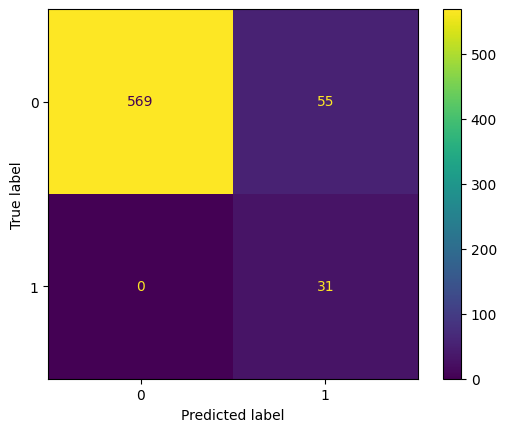

In [ ]:
X = nba_data[["ws", "x3p_percent", "blk_per_game", "trb", "per", "pts", 'ast', 'pts_per_game', 'ast_per_game']] 


y = nba_data['all_star']       

testdf = nba_data[nba_data['season'] == 2023]
Xtest = testdf[["ws", "x3p_percent", "blk_per_game", "trb", 'pts_per_game']]
ytest = testdf['all_star']

predictions = NN.predict(Xtest)

confusionmatrix = confusion_matrix(ytest, predictions)

ConfusionMatrixDisplay(confusionmatrix).plot();


<function matplotlib.pyplot.show(close=None, block=None)>

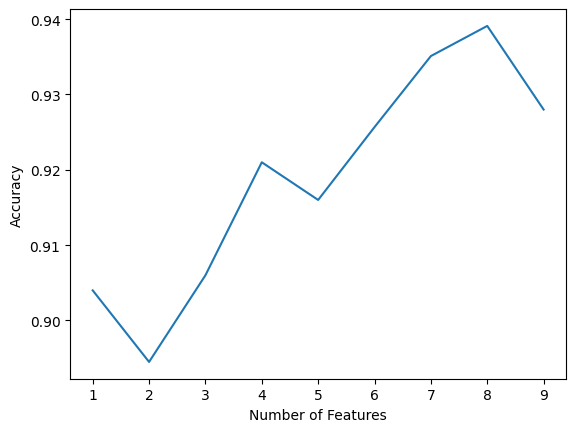

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0.917557251908397, 0.9206106870229007, 0.9435114503816794, 0.9526717557251908, 0.9603053435114504, 0.9587786259541985, 0.9557251908396946, 0.9572519083969465, 0.9557251908396946])
yXGB = np.array([.9040,.8945,.906,.921,.916,.92567,.9351,.9391,.928])
plt.xticks(x)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.plot(x, yXGB)
plt.show

In [ ]:
pred_all_stars = pd.DataFrame(predictions, columns=['all_star'])
pred_all_stars = pred_all_stars[pred_all_stars['all_star'] == True]
players = pd.DataFrame(testdf['player'])

df1 = pd.concat([players, pred_all_stars], 1)
df1 = df1.dropna(subset=['all_star']).drop_duplicates()

df2 = pd.concat([players, ytest], 1)
mask = df2['all_star'].isin([True])
df2 = df2[mask].drop_duplicates()

display(df1)

,player,all_star
4,Aaron Gordon,True
21,Anfernee Simons,True
22,Anthony Davis,True
23,Anthony Edwards,True
29,Bam Adebayo,True
37,Bojan Bogdanović,True
42,Bradley Beal,True
45,Brandon Ingram,True
46,Brook Lopez,True
55,CJ McCollum,True


# XGBoost

In [ ]:
# # Create a list of unique seasons in your dataset
# seasons = nba_data['season'].unique()

# # Initialize an empty list to store model performance results
# results = []

# # Iterate through the seasons
# for i in range(1, len(seasons) - 2):
#     # train_season = seasons[i]
#     # test_season = seasons[i + 1]
#     test_season = i

#     # Create training and test datasets based on the seasons
#     Xtrain = nba_data[nba_data['season'] != test_season][["ws", "x3p_percent", "blk_per_game", "trb", "per"]]
#     Xtest = nba_data[nba_data['season'] == test_season][["ws", "x3p_percent", "blk_per_game", "trb", "per"]]
#     ytrain = nba_data[nba_data['season'] != test_season]['all_star']
#     ytest = nba_data[nba_data['season'] == test_season]['all_star']

#     # Apply SMOTE to balance the training data (assuming you have imbalanced classes)
#     sm = SMOTE(random_state=10)

#     Xtrain, ytrain = sm.fit_resample(Xtrain, ytrain)
    
#     # Train a Random Forest Classifier
#     rf = RandomForestClassifier()
#     rf.fit(Xtrain, ytrain)

#     # Make predictions on the test set
#     predictions = rf.predict(Xtest)

#     # Evaluate model performance for the current season
#     # You can use metrics like accuracy, precision, recall, F1-score, etc.
#     accuracy = accuracy_score(ytest, predictions)
#     precision = precision_score(ytest, predictions)
#     recall = recall_score(ytest, predictions)

#     # Store the results for this season
    # results.append({
    #     'Train Season': train_season,
    #     'Test Season': test_season,
    #     'Accuracy': accuracy,
    #     'Precision': precision,
    #     'Recall': recall
    # })

# # Print or analyze the results as needed
# for result in results:
#     print(result)



allFeatures = ['x3p_percent','pts_per_game','ast_per_game','blk_per_game', 'ws','per', 'pts', 'ast','trb']

unique_seasons = nba_data['season'].unique()
print(len(unique_seasons))
results = []

for season in range(0, len(unique_seasons) - 2):  # Exclude the latest season for testing
    testdf = nba_data[nba_data['season'] == season]
    traindf = nba_data[nba_data['season'] != season]
    
    Xtrain = traindf[allFeatures]
    ytrain = traindf['all_star']
    
    Xtest = testdf[allFeatures]
    ytest = testdf['all_star']

    parameters = {
    'max_depth': range (2, 10, 3),
    'n_estimators': range(60, 220, 80),
    'learning_rate': np.arange(.01, .1, .01)
    }
    ada = ADASYN(random_state=42, sampling_strategy='minority')
    Xtrain, ytrain = ada.fit_resample(Xtrain, ytrain)

    xgbc = XGBC()

    grid_search = GridSearchCV(
    estimator=xgbc,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 5,
    verbose=True)

    xgbc.fit(Xtrain_resampled, ytrain_resampled)


    
    predictions = xgbc.predict(Xtest)
    confusion_matrix_result = confusion_matrix(ytest, predictions)

    results.append({
        'Test Season': season,
        'Accuracy': accuracy_score(ytest, predictions),
        'Precision': precision_score(ytest, predictions),
        'Recall': recall_score(ytest, predictions)
    })

for result in results:
    print(result)

44


NameError: name 'Xtrain_resampled' is not defined

27
                      player  prediction
23           Anthony Edwards       False
29               Bam Adebayo        True
97            Damian Lillard        True
119             De'Aaron Fox        True
123            DeMar DeRozan        True
146         Domantas Sabonis        True
148         Donovan Mitchell        True
199    Giannis Antetokounmpo        True
230                Ja Morant        True
269        Jaren Jackson Jr.       False
281             Jaylen Brown       False
284             Jayson Tatum        True
298              Joel Embiid        True
330             Jrue Holiday        True
338            Julius Randle        True
372             Kevin Durant        True
396             Kyrie Irving        True
403          Lauri Markkanen        True
404             LeBron James        True
412              Luka Dončić        True
485             Nikola Jokić        True
504            Pascal Siakam        True
512              Paul George        True
567  Shai Gil

,player,prediction
23,Anthony Edwards,False
29,Bam Adebayo,True
97,Damian Lillard,True
119,De'Aaron Fox,True
123,DeMar DeRozan,True
146,Domantas Sabonis,True
148,Donovan Mitchell,True
199,Giannis Antetokounmpo,True
230,Ja Morant,True
269,Jaren Jackson Jr.,False


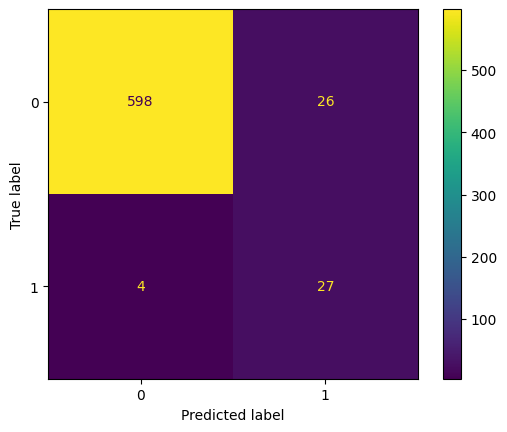

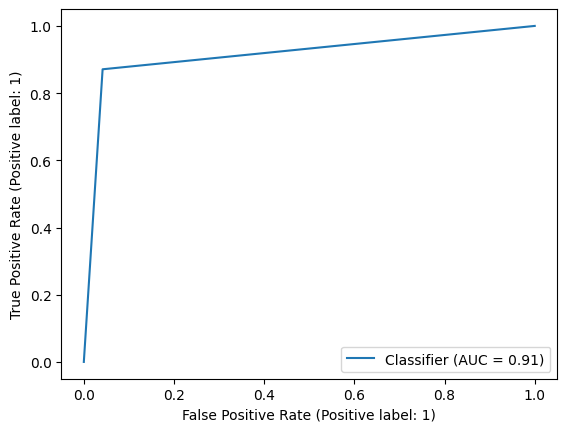

Accuracy Score:  95.42 %
Precision Score:  50.943 %
Recall Score:  87.097 %


In [ ]:

allFeatures = ['x3p_percent','pts_per_game','ast_per_game','blk_per_game', 'ws','per', 'pts', 'ast','trb']

testdf1 = nba_data[nba_data['season'] == 2023]
traindf = nba_data[nba_data['season'] != 2023]
    
Xtrain = traindf[allFeatures]
ytrain = traindf['all_star']
    
Xtest = testdf1[allFeatures]
ytest = testdf1['all_star']
    
sm = SMOTE(random_state=10)
Xtrain_resampled, ytrain_resampled = sm.fit_resample(Xtrain, ytrain)
    
# ada = ADASYN(random_state=42, sampling_strategy='minority')
# Xtrain_resampled, ytrain_resampled = ada.fit_resample(Xtrain, ytrain)

parameters = {
'max_depth': 8,
'n_estimators': 140,
'learning_rate': 0.09
}
    

xgbc = XGBC(**parameters)
'''
grid_search = GridSearchCV(
estimator=xgbc,
param_grid=parameters,
scoring = 'accuracy',
n_jobs = 10,
cv = 10,
verbose=True)

grid_search.fit(Xtrain_resampled, ytrain_resampled)'''
xgbc.fit(Xtrain_resampled, ytrain_resampled)
#print(grid_search.best_params_)
predictions1 = xgbc.predict(Xtest)
confusionmatrix = confusion_matrix(ytest, predictions1)
tn, fp, fn, tp = confusionmatrix.ravel()
print(tp)

ConfusionMatrixDisplay(confusionmatrix).plot();

predictions1 = np.where(predictions1 == 1, True, False)

pd.set_option('display.max_rows', None)

result_df = pd.concat([
    (testdf1[testdf1['all_star'] == True]['player']),
    pd.DataFrame(predictions1, columns=['prediction'])[testdf1['all_star'] == True]
], axis=1)

# Drop duplicate players
result_df = result_df.drop_duplicates(subset='player')

# Display the result
print(result_df)
display((pd.concat([(testdf1[testdf1['all_star'] == True])['player'], (pd.DataFrame(predictions1, columns=['prediction'])[testdf1['all_star'] == True])], 1)).drop_duplicates(subset='player'))
#actual_all_stars_df = testdf[testdf['all_star'] == True][['player']]
#actual_all_stars_df['Predicted_All_Star'] = predictions[actual_all_stars_df.index] == 1

#print(actual_all_stars_df)


#display(result_df)


sklearn.metrics.RocCurveDisplay.from_predictions(ytest, predictions1)
plt.show()

print("Accuracy Score: ", round(accuracy_score(ytest, predictions1) * 100, 3), "%")
print("Precision Score: ", round(precision_score(ytest, predictions1) * 100, 3), "%")
print("Recall Score: ", round(recall_score(ytest, predictions1) * 100, 3), "%")

In [ ]:
display(result_df)

,player,prediction
23,Anthony Edwards,False
29,Bam Adebayo,True
97,Damian Lillard,True
119,De'Aaron Fox,True
123,DeMar DeRozan,True
146,Domantas Sabonis,True
148,Donovan Mitchell,True
199,Giannis Antetokounmpo,True
230,Ja Morant,True
269,Jaren Jackson Jr.,False


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9ae238f-55ac-4c86-a74a-4f87062ad280' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>